# A Practical Starters’ Guide to Causal Structure Learning with Bayesian Methods in Python

- install the package in your machine 
- Install Python bnlearn package
- pip install bnlearn

In [1]:
%pip install bnlearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import bnlearn
import pandas as pd
from scipy.stats import hypergeom

In [3]:
# Load predictive maintainance data set
df = bnlearn.import_example(data = 'predictive_maintenance')

In [4]:
# print dataframe 
print(df)

        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure

**Null hypothesis: There is no association between machine failure and power failure (PWF).**

In [5]:
print(df[['Machine failure', 'PWF']])

      Machine failure  PWF
0                   0    0
1                   0    0
2                   0    0
3                   0    0
4                   0    0
...               ...  ...
9995                0    0
9996                0    0
9997                0    0
9998                0    0
9999                0    0

[10000 rows x 2 columns]


In [6]:
# Total number of samples 
N = df.shape[0]
N

10000

In [7]:
# Number of success in the population 
K = sum(df['Machine failure']== 1)

In [8]:
# Sample size/number of draws
n = sum(df['PWF'] == 1)

In [9]:
# Overlap between Power failure and machine failure
x = sum((df['PWF'] == 1) & (df['Machine failure'] == 1))

In [10]:
print(x -1 , N, n, K)

94 10000 95 339


In [11]:
# Compute 
P = hypergeom.sf(x, N, n, K)
P = hypergeom.sf(94, 10000, 95, 339)

In [12]:
print(P)

1.6691442339042845e-146


# Sprinkler data

In [16]:
import bnlearn as bn
# Load the sprinkler data
df_sprinkler = bnlearn.import_example(data= 'sprinkler')

In [17]:
# print the data 
print(df_sprinkler)

     Cloudy  Sprinkler  Rain  Wet_Grass
0         0          0     0          0
1         1          0     1          1
2         0          1     0          1
3         1          1     1          1
4         1          1     1          1
..      ...        ...   ...        ...
995       1          0     1          1
996       1          0     1          1
997       1          0     1          1
998       0          0     0          0
999       0          1     1          1

[1000 rows x 4 columns]


In [19]:
# learn the DAG in the data using Bayesian network 
DAG = bn.structure_learning.fit(df_sprinkler)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [20]:
# print the data in the scree
print(df_sprinkler)

     Cloudy  Sprinkler  Rain  Wet_Grass
0         0          0     0          0
1         1          0     1          1
2         0          1     0          1
3         1          1     1          1
4         1          1     1          1
..      ...        ...   ...        ...
995       1          0     1          1
996       1          0     1          1
997       1          0     1          1
998       0          0     0          0
999       0          1     1          1

[1000 rows x 4 columns]


In [21]:
# print the DAG
print(DAG['adjmat'])

target     Cloudy  Sprinkler   Rain  Wet_Grass
source                                        
Cloudy      False      False  False      False
Sprinkler    True      False   True       True
Rain         True      False  False      False
Wet_Grass   False      False   True      False


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


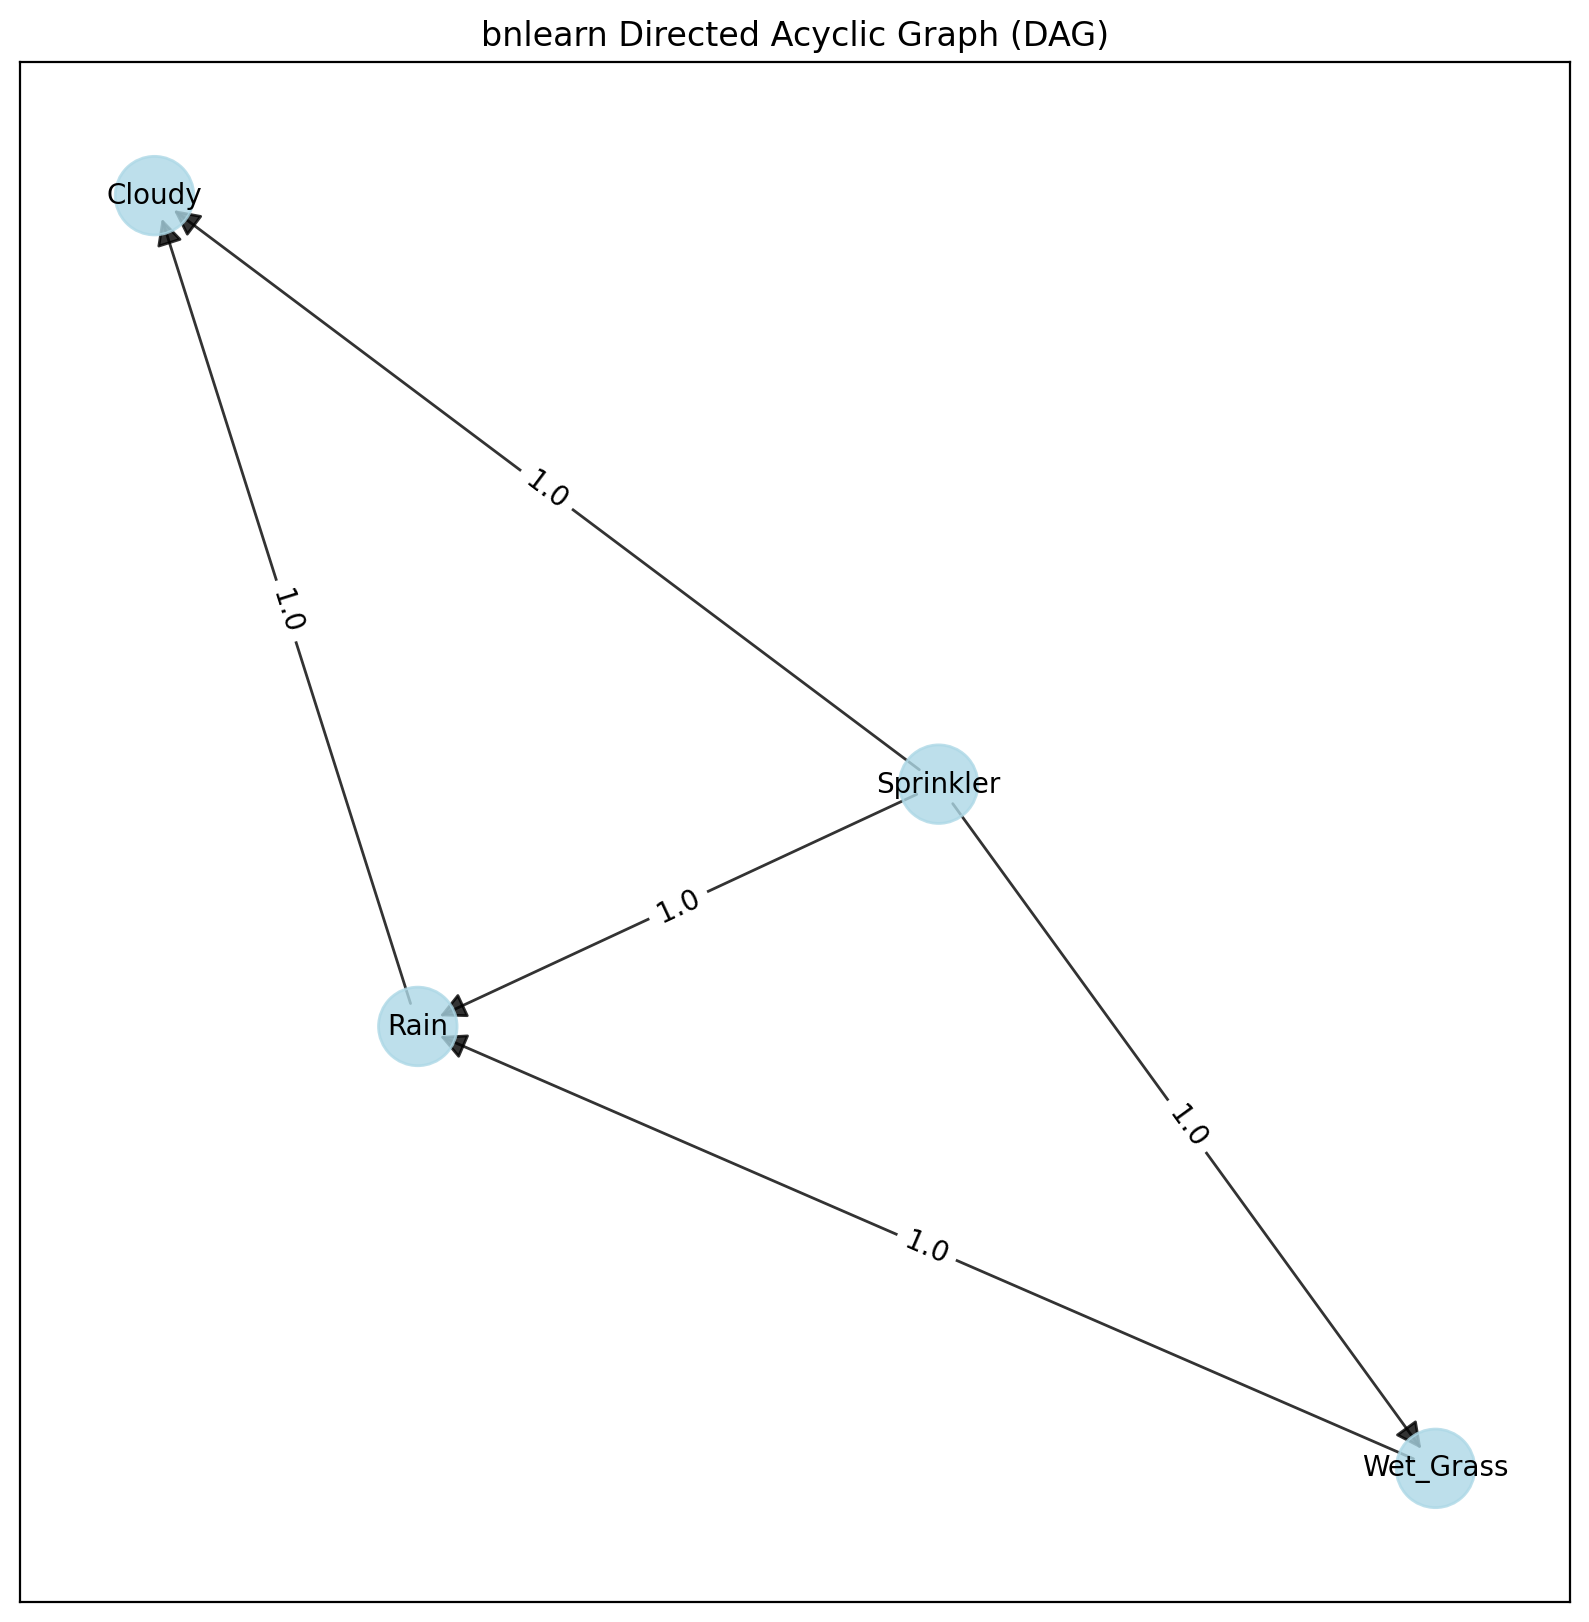

In [23]:
# Plot in Python
G = bn.plot(DAG)

In [26]:
# Make it interactive as HTML
%pip install d3blocks
from d3blocks import D3Blocks
G = bn.plot(DAG, interactive = True)

  Using cached d3blocks-1.6.1-py3-none-any.whl (1.5 MB)
  Using cached colourmap-1.2.0-py3-none-any.whl (11 kB)
  Using cached d3graph-2.6.1-py3-none-any.whl (109 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for markupsafe: filename=MarkupSafe-2.0.1-cp311-cp311-win_amd64.whl size=17055 sha256=33670c55fd04e3a1b10e4adc032c4e5360331e700754c887f943a78068775659
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\64\0d\30\eb3402e15eeeb3a2cc22f6bc1320c9b3fb9093e042d752d180
Successfully built markupsafe
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 6.2.1 requires docutils<0.20,>=0.18.1, but you have docutils 0.21.2 which is incompatible.
streamlit 1.32.2 requires packaging<24,>=16.8, but you have packaging 24.2 which is incompatible.
werkzeug 3.0.1 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
INFO:d3blocks.d3blocks:Cleaning edge_properties and config parameters..
[27-07-2025 12:37:39] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.


[27-07-2025 12:37:40] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[27-07-2025 12:37:40] [d3graph.d3graph] [INFO] Set directed=True to see the markers!
[27-07-2025 12:37:40] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[27-07-2025 12:37:40] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[27-07-2025 12:37:40] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[27-07-2025 12:37:40] [d3graph.d3graph] [INFO] Converting adjacency matrix into source-target..
[27-07-2025 12:37:40] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[27-07-2025 12:37:40] [d3graph.d3graph] [INFO] Slider range is set to [0, 1]
[27-07-2025 12:37:41] [d3graph.d3graph] [INFO] Write to path: [C:\Users\User\AppData\Local\Temp\d3graph\d3graph.html]
[27-07-2025 12:37:41] [d3graph.d3graph] [INFO] File already exists and will be overwritten: [C:\Users\User\AppData\Local\Temp\d3graph\d3graph.html]
[27-07-2025 12:37:41] [d3graph.d3graph] [INFO] Keep only edges with weigh

In [27]:
# 'hc' or 'hillclimbsearch'
model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
model_hc_k2   = bn.structure_learning.fit(df, methodtype='hc', scoretype='k2')
model_hc_bdeu = bn.structure_learning.fit(df, methodtype='hc', scoretype='bdeu')

# 'ex' or 'exhaustivesearch'
model_ex_bic  = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')
model_ex_k2   = bn.structure_learning.fit(df, methodtype='ex', scoretype='k2')
model_ex_bdeu = bn.structure_learning.fit(df, methodtype='ex', scoretype='bdeu')

# 'cs' or 'constraintsearch'
model_cs_k2   = bn.structure_learning.fit(df, methodtype='cs', scoretype='k2')
model_cs_bdeu = bn.structure_learning.fit(df, methodtype='cs', scoretype='bdeu')
model_cs_bic  = bn.structure_learning.fit(df, methodtype='cs', scoretype='bic')

# 'cl' or 'chow-liu' (requires setting root_node parameter)
model_cl      = bn.structure_learning.fit(df, methodtype='cl', root_node='Wet_Grass')

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]


KeyboardInterrupt: 

In [ ]:
import bnlearn as bn

# Load sprinkler data set
df = bn.import_example('sprinkler')

# The edges can be created using the available variables.
print(df.columns)
# ['Cloudy', 'Sprinkler', 'Rain', 'Wet_Grass']

# Define the causal dependencies based on your expert/domain knowledge.
# Left is the source, and right is the target node.
edges = [('Cloudy', 'Sprinkler'),
         ('Cloudy', 'Rain'),
         ('Sprinkler', 'Wet_Grass'),
         ('Rain', 'Wet_Grass')]

# Create the DAG. If not CPTs are present, bnlearn will auto generate placeholders for the CPTs.
DAG = bn.make_DAG(edges)

# Plot the DAG. This is identical as shown in Figure 3
bn.plot(DAG)

# Parameter learning on the user-defined DAG and input data using maximumlikelihood
model = bn.parameter_learning.fit(DAG, df, methodtype='ml')

# Print the learned CPDs
bn.print_CPD(model)

In [ ]:
# Examples to illustrate how to manually compute MLE for the node Cloudy and Rain:

# Compute CPT for the Cloudy Node:
# This node has no conditional dependencies and can easily be computed as following:

# P(Cloudy=0)
sum(df['Cloudy']==0) / df.shape[0] # 0.488

# P(Cloudy=1)
sum(df['Cloudy']==1) / df.shape[0] # 0.512

# Compute CPT for the Rain Node:
# This node has a conditional dependency from Cloudy and can be computed as following:

# P(Rain=0 | Cloudy=0)
sum( (df['Cloudy']==0) & (df['Rain']==0) ) / sum(df['Cloudy']==0) # 394/488 = 0.807377049

# P(Rain=1 | Cloudy=0)
sum( (df['Cloudy']==0) & (df['Rain']==1) ) / sum(df['Cloudy']==0) # 94/488  = 0.192622950

# P(Rain=0 | Cloudy=1)
sum( (df['Cloudy']==1) & (df['Rain']==0) ) / sum(df['Cloudy']==1) # 91/512  = 0.177734375

# P(Rain=1 | Cloudy=1)
sum( (df['Cloudy']==1) & (df['Rain']==1) ) / sum(df['Cloudy']==1) # 421/512 = 0.822265625

In [ ]:
# Parameter learning on the user-defined DAG and input data using Bayes
model_bayes = bn.parameter_learning.fit(DAG, df, methodtype='bayes')

# Print the learned CPDs
bn.print_CPD(model_bayes)

How probable is it to have wet grass given that the sprinkler is off?

In [ ]:
import bnlearn as bn

# Load sprinkler data set
df = bn.import_example('sprinkler')

# Define the causal dependencies based on your expert/domain knowledge.
# Left is the source, and right is the target node.
edges = [('Cloudy', 'Sprinkler'),
         ('Cloudy', 'Rain'),
         ('Sprinkler', 'Wet_Grass'),
         ('Rain', 'Wet_Grass')]

# Create the DAG
DAG = bn.make_DAG(edges)

# Parameter learning on the user-defined DAG and input data using Bayes to estimate the CPTs
model = bn.parameter_learning.fit(DAG, df, methodtype='bayes')
bn.print_CPD(model)

q1 = bn.inference.fit(model, variables=['Wet_Grass'], evidence={'Sprinkler':0})



